In [66]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import urllib
from time import sleep
import json
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [67]:
# https://www.espn.com/nba/team/roster/_/name/bos/boston-celtics


def build_team_url():
    url = 'https://www.espn.com/nba/teams'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
    r = requests.get(url, headers=headers)
    
    teams_source = r.text
    
    teams = dict(re.findall(r"www\.espn\.com/nba/team/_/name/(\w+)/(.+?)\",", teams_source))
    
    roster_urls = []
    
    for key in teams.keys():
        roster_urls.append("https://www.espn.com/nba/team/roster/_/name/" + key + '/' + teams[key])
        teams[key] = str(teams[key])

    return dict(zip(teams.values(),roster_urls))

In [68]:
rosters = build_team_url()
rosters

{'boston-celtics': 'https://www.espn.com/nba/team/roster/_/name/bos/boston-celtics',
 'brooklyn-nets': 'https://www.espn.com/nba/team/roster/_/name/bkn/brooklyn-nets',
 'new-york-knicks': 'https://www.espn.com/nba/team/roster/_/name/ny/new-york-knicks',
 'philadelphia-76ers': 'https://www.espn.com/nba/team/roster/_/name/phi/philadelphia-76ers',
 'toronto-raptors': 'https://www.espn.com/nba/team/roster/_/name/tor/toronto-raptors',
 'chicago-bulls': 'https://www.espn.com/nba/team/roster/_/name/chi/chicago-bulls',
 'cleveland-cavaliers': 'https://www.espn.com/nba/team/roster/_/name/cle/cleveland-cavaliers',
 'detroit-pistons': 'https://www.espn.com/nba/team/roster/_/name/det/detroit-pistons',
 'indiana-pacers': 'https://www.espn.com/nba/team/roster/_/name/ind/indiana-pacers',
 'milwaukee-bucks': 'https://www.espn.com/nba/team/roster/_/name/mil/milwaukee-bucks',
 'atlanta-hawks': 'https://www.espn.com/nba/team/roster/_/name/atl/atlanta-hawks',
 'charlotte-hornets': 'https://www.espn.com/nb

In [69]:
url = "https://www.espn.com/nba/team/roster/_/name/gs/golden-state-warriors"
response = urllib.request.urlopen(url)
page_source = response.read().decode('utf-8')

data_regex = r'\{"shortName":.*?}'  
json_data_matches = re.findall(data_regex, page_source)

players = []
for match in json_data_matches:
    try:
        players.append(json.loads(match))  
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        continue  

players

[{'shortName': 'T. Armstrong',
  'name': 'Taran Armstrong',
  'href': 'https://www.espn.com/nba/player/_/id/4896850/taran-armstrong',
  'uid': 's:40~l:46~a:4896850',
  'guid': '761d5577-29c7-35f9-b9ed-c24ea9f0717f',
  'id': '4896850',
  'height': '6\' 6"',
  'weight': '190 lbs',
  'age': 23,
  'position': 'G',
  'birthDate': '01/15/02',
  'headshot': 'https://a.espncdn.com/combiner/i?img=/i/headshots/nophoto.png&w=200&h=146',
  'lastName': 'Taran Armstrong',
  'experience': 0,
  'college': 'California Baptist'},
 {'shortName': 'J. Butler III',
  'name': 'Jimmy Butler III',
  'href': 'https://www.espn.com/nba/player/_/id/6430/jimmy-butler-iii',
  'uid': 's:40~l:46~a:6430',
  'guid': '076edf90-d167-2d15-88cb-a174c984b9e3',
  'id': '6430',
  'height': '6\' 7"',
  'weight': '230 lbs',
  'age': 35,
  'position': 'SF',
  'jersey': '10',
  'salary': '$48,798,677',
  'birthDate': '09/14/89',
  'headshot': 'https://a.espncdn.com/i/headshots/nba/players/full/6430.png',
  'lastName': 'Jimmy Butle

In [70]:
curry = players[2]
curry

{'shortName': 'Y. Collins',
 'name': 'Yuri Collins',
 'href': 'https://www.espn.com/nba/player/_/id/4432957/yuri-collins',
 'uid': 's:40~l:46~a:4432957',
 'guid': '835ed764-227c-3b0f-be4f-f4674a40a33e',
 'id': '4432957',
 'height': '5\' 11"',
 'weight': '195 lbs',
 'age': 23,
 'position': 'G',
 'jersey': '99',
 'birthDate': '03/07/01',
 'headshot': 'https://a.espncdn.com/combiner/i?img=/i/headshots/nophoto.png&w=200&h=146',
 'lastName': 'Yuri Collins',
 'experience': 0,
 'college': 'Saint Louis'}

In [71]:
players_dict = {player['name'].lower(): player for player in players}

players_dict['stephen curry']


{'shortName': 'S. Curry',
 'name': 'Stephen Curry',
 'href': 'https://www.espn.com/nba/player/_/id/3975/stephen-curry',
 'uid': 's:40~l:46~a:3975',
 'guid': '5dda51f1-50c9-66e1-2026-400b73f34fad',
 'id': '3975',
 'height': '6\' 2"',
 'weight': '185 lbs',
 'age': 36,
 'position': 'PG',
 'jersey': '30',
 'salary': '$55,761,216',
 'birthDate': '03/14/88',
 'headshot': 'https://a.espncdn.com/i/headshots/nba/players/full/3975.png',
 'lastName': 'Stephen Curry',
 'experience': 15,
 'college': 'Davidson'}

In [72]:
def get_players_info(roster_url):
    response = urllib.request.urlopen(roster_url)
    page_source = response.read().decode('utf-8')
    player_regex = r'\{"shortName":.*?}'
    json_data_matches = re.findall(player_regex, page_source)
    players = []
    for match in json_data_matches:
        try:
            players.append(json.loads(match))  
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            continue  
    
    players_dict = {player['name'].lower(): player for player in players}
    return players_dict

In [73]:
get_players_info('https://www.espn.com/nba/team/roster/_/name/mia/miami-heat')

{'bam adebayo': {'shortName': 'B. Adebayo',
  'name': 'Bam Adebayo',
  'href': 'https://www.espn.com/nba/player/_/id/4066261/bam-adebayo',
  'uid': 's:40~l:46~a:4066261',
  'guid': '38b3edc5-57ff-d3ff-9aa2-2865f7f01a4c',
  'id': '4066261',
  'height': '6\' 9"',
  'weight': '255 lbs',
  'age': 27,
  'position': 'C',
  'jersey': '13',
  'salary': '$34,848,340',
  'birthDate': '07/18/97',
  'headshot': 'https://a.espncdn.com/i/headshots/nba/players/full/4066261.png',
  'lastName': 'Bam Adebayo',
  'experience': 7,
  'college': 'Kentucky'},
 'kyle anderson': {'shortName': 'K. Anderson',
  'name': 'Kyle Anderson',
  'href': 'https://www.espn.com/nba/player/_/id/2993874/kyle-anderson',
  'uid': 's:40~l:46~a:2993874',
  'guid': '0b5e3fdc-796d-c463-655c-9c8f6622bcd0',
  'id': '2993874',
  'height': '6\' 9"',
  'weight': '230 lbs',
  'age': 31,
  'position': 'SF',
  'jersey': '20',
  'salary': '$8,780,488',
  'birthDate': '09/20/93',
  'headshot': 'https://a.espncdn.com/i/headshots/nba/players/

In [74]:
all_players = dict()
for team in rosters.keys():
    print("Gathering player info for team: " + team)
    all_players[team] = get_players_info(rosters[team])

Gathering player info for team: boston-celtics
Gathering player info for team: brooklyn-nets
Gathering player info for team: new-york-knicks
Gathering player info for team: philadelphia-76ers
Gathering player info for team: toronto-raptors
Gathering player info for team: chicago-bulls
Gathering player info for team: cleveland-cavaliers
Gathering player info for team: detroit-pistons
Gathering player info for team: indiana-pacers
Gathering player info for team: milwaukee-bucks
Gathering player info for team: atlanta-hawks
Gathering player info for team: charlotte-hornets
Gathering player info for team: miami-heat
Gathering player info for team: orlando-magic
Gathering player info for team: washington-wizards
Gathering player info for team: denver-nuggets
Gathering player info for team: minnesota-timberwolves
Gathering player info for team: oklahoma-city-thunder
Gathering player info for team: portland-trail-blazers
Gathering player info for team: utah-jazz
Gathering player info for team

In [75]:
all_players['atlanta-hawks']

{'dominick barlow': {'shortName': 'D. Barlow',
  'name': 'Dominick Barlow',
  'href': 'https://www.espn.com/nba/player/_/id/4870562/dominick-barlow',
  'uid': 's:40~l:46~a:4870562',
  'guid': 'b6f6857f-9a83-30a6-85a7-2e02c49d5ae5',
  'id': '4870562',
  'height': '6\' 8"',
  'weight': '215 lbs',
  'age': 21,
  'position': 'F',
  'jersey': '0',
  'salary': 0,
  'birthDate': '05/26/03',
  'headshot': 'https://a.espncdn.com/i/headshots/nba/players/full/4870562.png',
  'lastName': 'Dominick Barlow',
  'experience': 2},
 'kobe bufkin': {'shortName': 'K. Bufkin',
  'name': 'Kobe Bufkin',
  'href': 'https://www.espn.com/nba/player/_/id/4683736/kobe-bufkin',
  'uid': 's:40~l:46~a:4683736',
  'guid': '0fe19f0d-036e-35de-80f5-ddfc232292db',
  'id': '4683736',
  'height': '6\' 4"',
  'weight': '195 lbs',
  'age': 21,
  'position': 'G',
  'jersey': '4',
  'salary': '$4,299,000',
  'birthDate': '09/21/03',
  'headshot': 'https://a.espncdn.com/i/headshots/nba/players/full/4683736.png',
  'lastName': 

In [76]:
def any_roster_df(team):
    if team in all_players:
        team_df = pd.DataFrame.from_dict(all_players[team])
        team_df = team_df.T
        team_df['team'] = team
        team_df['name'] = team_df.index
        team_df = team_df.drop(['name','href','uid','guid','headshot','lastName','shortName'], axis=1)  
        team_df["salary"] = team_df["salary"].fillna("not specified")
        team_df["jersey"] = team_df["jersey"].fillna("not specified")
        team_df["college"] = team_df["college"].fillna("not specified")


        team_df = team_df.dropna(axis=1) 


        team_df.index = team_df.index.map(str.title)
        team_df.columns = team_df.columns.map(str.title)
        team_df.rename(columns={'Birthdate':'Birth date'}, inplace=True)
        team_df['Team'] = team_df['Team'].replace('-', ' ', regex=True).astype(object)
        team_df['Team'] = team_df['Team'].str.title()
        
    return team_df

In [77]:
any_roster_df('boston-celtics')

,Id,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,Team
Jaylen Brown,3917376,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,Boston Celtics
Torrey Craig,2528693,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,Boston Celtics
Jd Davison,4576085,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,Boston Celtics
Sam Hauser,4065804,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,Boston Celtics
Jrue Holiday,3995,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,Boston Celtics
Al Horford,3213,"6' 9""",240 lbs,38,C,42,"$9,500,000",06/03/86,17,Florida,Boston Celtics
Luke Kornet,3064560,"7' 1""",250 lbs,29,C,40,"$2,087,519",07/15/95,7,Vanderbilt,Boston Celtics
Miles Norris,4397104,"6' 7""",220 lbs,24,F,8,not specified,04/15/00,1,UC Santa Barbara,Boston Celtics
Drew Peterson,4397689,"6' 9""",205 lbs,25,F,13,0,11/09/99,1,USC,Boston Celtics
Kristaps Porzingis,3102531,"7' 2""",240 lbs,29,C,8,"$29,268,293",08/02/95,9,not specified,Boston Celtics


In [78]:
all_players_df = pd.DataFrame()
# loop through each team, create a pandas DataFrame, and append
for team in all_players.keys():
    team_df = pd.DataFrame.from_dict(all_players[team], orient = "index")
    team_df['team'] = team
    team_df = team_df.drop(['name','href','uid','guid','headshot','lastName','shortName'], axis=1)  
    team_df["salary"] = team_df["salary"].fillna("not specified")
    team_df["jersey"] = team_df["jersey"].fillna("not specified")
    team_df["college"] = team_df["college"].fillna("not specified")


    team_df = team_df.dropna(axis=1) 

    team_df.index = team_df.index.map(str.title)
    team_df.columns = team_df.columns.map(str.title)
    team_df.rename(columns={'Birthdate':'Birth date'}, inplace=True)
    team_df['Team'] = team_df['Team'].replace('-', ' ', regex=True).astype(object)
    team_df['Team'] = team_df['Team'].str.title()
    
    all_players_df = all_players_df._append(team_df)

In [79]:
all_players_df.head()

,Id,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,Team
Jaylen Brown,3917376,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,Boston Celtics
Torrey Craig,2528693,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,Boston Celtics
Jd Davison,4576085,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,Boston Celtics
Sam Hauser,4065804,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,Boston Celtics
Jrue Holiday,3995,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,Boston Celtics


In [80]:
url = 'https://www.espn.com/nba/player/stats/_/id/3917376'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
r = requests.get(url, headers=headers)
player_page = r.text
# stats_regex = ('\[\"Career\",\"\",(.*?)\]\},\{\"ttl\"\:\"Regular Season Totals\"')
stats_regex = (r'\[\"2024-25\",\{.*?\},(.*?)\]\],\"car\"\:\[\"Career\",\"\",.*?\]\},\{\"ttl\"\:\"Regular Season Totals\"')
# stats_regex = (r'/(2024-25)')

player_stats = re.findall(stats_regex,player_page)
player_stats

['"51","51","35.1","8.6-18.5","46.5","1.9-5.9","32.7","4.1-5.4","75.8","1.5","4.5","6.0","4.7","0.3","1.2","2.5","2.7","23.2"']

In [81]:
from itertools import chain
player_stats = player_stats[0].replace("\"", "").split(",")
player_stats = list(chain.from_iterable([i.split("-") for i in player_stats]))
player_stats = list(map(float,player_stats))
player_stats


[51.0,
 51.0,
 35.1,
 8.6,
 18.5,
 46.5,
 1.9,
 5.9,
 32.7,
 4.1,
 5.4,
 75.8,
 1.5,
 4.5,
 6.0,
 4.7,
 0.3,
 1.2,
 2.5,
 2.7,
 23.2]

In [82]:
career_stats_df = pd.DataFrame(columns = ["GP","GS","MIN","FGM", "FGA","FG%","3PTM","3PTA","3P%","FTM","FTA","FT%","OR","DR","REB","AST","BLK","STL","PF","TO","PTS"])
for player_index in all_players_df.index:
    url = 'https://www.espn.com/nba/player/stats/_/id/' + str(all_players_df.loc[player_index]['Id'])
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
    r = requests.get(url, headers=headers)
    player_page = r.text
    stats_regex = (r'\[\"2024-25\",\{.*?\},(.*?)\]\],\"car\"\:\[\"Career\",\"\",.*?\]\},\{\"ttl\"\:\"Regular Season Totals\"')
    player_stats = re.findall(stats_regex,player_page)
    try:
        player_stats = player_stats[0].replace("\"", "").split(",")
        player_stats = list(chain.from_iterable([i.split("-") for i in player_stats]))
        player_stats = list(map(float,player_stats))
        career_stats_df = career_stats_df._append(pd.Series(player_stats, index = career_stats_df.columns, name=player_index))
    except:
        print(player_index + " has no info, ", end = "")
career_stats_df

Torrey Craig has no info, Miles Norris has no info, Reece Beekman has no info, Kendall Brown has no info, Maxwell Lewis has no info, D'Angelo Russell has no info, Kevin Mccullar Jr. has no info, Delon Wright has no info, Jared Butler has no info, Quentin Grimes has no info, Eugene Omoruyi has no info, Jared Rhoden has no info, Orlando Robinson has no info, Zach Collins has no info, Kevin Huerter has no info, Tre Jones has no info, Emanuel Miller has no info, Jahmir Young has no info, Javonte Green has no info, De'Andre Hunter has no info, Ron Harper Jr. has no info, Dennis Schroder has no info, Tolu Smith has no info, Lindy Waters Iii has no info, Thomas Bryant has no info, Kyle Kuzma has no info, Kevin Porter Jr. has no info, Jericho Sims has no info, Caris Levert has no info, Terance Mann has no info, Georges Niang has no info, Wendell Moore Jr. has no info, Jusuf Nurkic has no info, Josh Okogie has no info, Elfrid Payton has no info, Kyle Anderson has no info, Davion Mitchell has no

,GP,GS,MIN,FGM,FGA,FG%,3PTM,3PTA,3P%,FTM,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
Jaylen Brown,51.0,51.0,35.1,8.6,18.5,46.5,1.9,5.9,32.7,4.1,...,75.8,1.5,4.5,6.0,4.7,0.3,1.2,2.5,2.7,23.2
Jd Davison,7.0,0.0,4.6,0.3,1.0,28.6,0.1,0.6,25.0,0.6,...,80.0,0.0,0.4,0.4,0.3,0.0,0.3,0.1,0.9,1.3
Sam Hauser,52.0,11.0,20.4,2.7,6.0,44.6,2.1,5.1,40.6,0.1,...,100.0,0.7,2.4,3.0,1.0,0.2,0.6,1.2,0.4,7.5
Jrue Holiday,47.0,47.0,30.1,4.0,9.1,43.8,1.7,5.0,34.2,1.1,...,90.0,1.1,3.2,4.3,3.7,0.4,1.0,1.6,1.4,10.8
Al Horford,48.0,32.0,26.9,3.0,7.1,41.4,1.8,4.9,36.0,0.4,...,90.9,1.2,4.5,5.6,1.8,0.8,0.6,1.4,0.7,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chris Paul,59.0,59.0,28.7,3.0,7.2,41.1,1.7,4.7,36.1,1.3,...,93.8,0.5,3.3,3.8,7.9,0.2,1.3,1.9,1.5,8.9
Jeremy Sochan,40.0,19.0,25.6,4.7,8.5,55.4,0.5,1.5,34.4,1.6,...,70.3,2.4,4.6,7.0,2.5,0.6,0.9,2.4,1.7,11.6
Devin Vassell,44.0,33.0,30.3,5.9,13.8,42.8,2.1,6.3,33.3,1.5,...,77.0,0.5,3.0,3.5,2.8,0.5,1.2,1.5,1.4,15.4
Victor Wembanyama,46.0,46.0,33.2,8.9,18.6,47.6,3.1,8.8,35.2,3.4,...,83.6,1.8,9.2,11.0,3.7,3.8,1.1,2.3,3.2,24.3


In [83]:
all_stats_df = all_players_df.join(career_stats_df)
all_stats_df

,Id,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
Jaylen Brown,3917376,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,...,75.8,1.5,4.5,6.0,4.7,0.3,1.2,2.5,2.7,23.2
Torrey Craig,2528693,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jd Davison,4576085,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,...,80.0,0.0,0.4,0.4,0.3,0.0,0.3,0.1,0.9,1.3
Sam Hauser,4065804,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,...,100.0,0.7,2.4,3.0,1.0,0.2,0.6,1.2,0.4,7.5
Jrue Holiday,3995,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,...,90.0,1.1,3.2,4.3,3.7,0.4,1.0,1.6,1.4,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chris Paul,2779,"6' 0""",175 lbs,39,PG,3,"$10,460,000",05/06/85,19,Wake Forest,...,93.8,0.5,3.3,3.8,7.9,0.2,1.3,1.9,1.5,8.9
Jeremy Sochan,4610139,"6' 8""",230 lbs,21,F,10,"$5,570,040",05/20/03,2,Baylor,...,70.3,2.4,4.6,7.0,2.5,0.6,0.9,2.4,1.7,11.6
Devin Vassell,4395630,"6' 5""",205 lbs,24,SG,24,"$29,347,826",08/23/00,4,Florida State,...,77.0,0.5,3.0,3.5,2.8,0.5,1.2,1.5,1.4,15.4
Victor Wembanyama,5104157,"7' 3""",235 lbs,21,C,1,"$12,768,960",01/04/04,1,not specified,...,83.6,1.8,9.2,11.0,3.7,3.8,1.1,2.3,3.2,24.3


In [84]:
df_boston = all_stats_df.loc[all_stats_df['Team'] == 'Boston Celtics']
df_boston

,Id,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
Jaylen Brown,3917376,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,...,75.8,1.5,4.5,6.0,4.7,0.3,1.2,2.5,2.7,23.2
Torrey Craig,2528693,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jd Davison,4576085,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,...,80.0,0.0,0.4,0.4,0.3,0.0,0.3,0.1,0.9,1.3
Sam Hauser,4065804,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,...,100.0,0.7,2.4,3.0,1.0,0.2,0.6,1.2,0.4,7.5
Jrue Holiday,3995,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,...,90.0,1.1,3.2,4.3,3.7,0.4,1.0,1.6,1.4,10.8
Al Horford,3213,"6' 9""",240 lbs,38,C,42,"$9,500,000",06/03/86,17,Florida,...,90.9,1.2,4.5,5.6,1.8,0.8,0.6,1.4,0.7,8.1
Luke Kornet,3064560,"7' 1""",250 lbs,29,C,40,"$2,087,519",07/15/95,7,Vanderbilt,...,74.6,2.3,2.6,4.9,1.6,1.0,0.5,1.5,0.4,5.2
Miles Norris,4397104,"6' 7""",220 lbs,24,F,8,not specified,04/15/00,1,UC Santa Barbara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drew Peterson,4397689,"6' 9""",205 lbs,25,F,13,0,11/09/99,1,USC,...,85.7,0.3,1.4,1.7,0.7,0.1,0.2,0.8,0.4,2.6
Kristaps Porzingis,3102531,"7' 2""",240 lbs,29,C,8,"$29,268,293",08/02/95,9,not specified,...,81.3,1.6,5.2,6.8,1.9,1.6,0.8,2.8,1.2,18.9


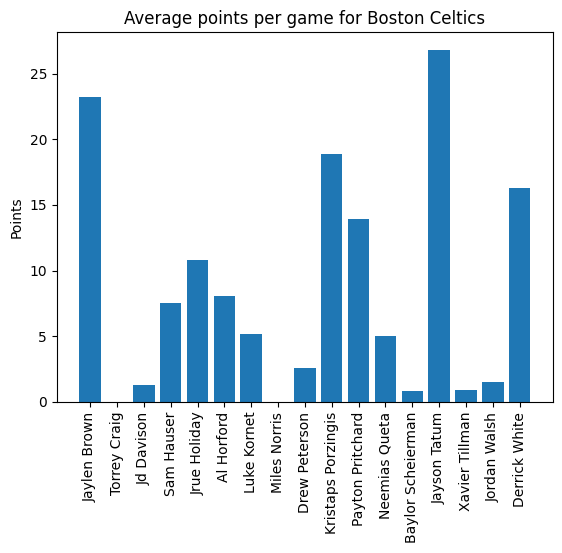

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.bar(df_boston.index, df_boston["PTS"])
ax.set_ylabel('Points')
ax.set_title('Average points per game for Boston Celtics')
ax.set_xticklabels(df_boston.index, rotation=90)

plt.show()

In [86]:
best_scorers = all_stats_df.nlargest(10, 'PTS')
best_scorers

,Id,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
Shai Gilgeous-Alexander,4278073,"6' 6""",195 lbs,26,PG,2,"$35,859,950",07/12/98,6,Kentucky,...,89.6,0.9,4.2,5.2,6.2,1.0,1.8,2.2,2.5,32.6
Giannis Antetokounmpo,3032977,"6' 11""",243 lbs,30,PF,34,"$48,787,676",12/06/94,11,not specified,...,58.9,2.2,9.9,12.1,5.9,1.3,0.7,2.5,3.3,30.9
Nikola Jokic,3112335,"6' 11""",284 lbs,30,C,15,"$51,415,938",02/19/95,9,not specified,...,82.2,2.9,9.9,12.7,10.4,0.7,1.8,2.2,3.3,28.9
Anthony Edwards,4594268,"6' 4""",225 lbs,23,SG,5,"$42,176,400",08/05/01,4,Georgia,...,84.2,0.8,5.2,6.0,4.6,0.6,1.2,1.9,3.4,27.6
Jayson Tatum,4065648,"6' 8""",210 lbs,27,SF,0,"$34,848,340",03/03/98,7,Duke,...,80.2,0.7,8.2,8.8,5.8,0.5,1.1,2.2,2.9,26.8
Kevin Durant,3202,"6' 11""",240 lbs,36,PF,35,"$51,179,021",09/29/88,17,Texas,...,81.9,0.4,5.6,6.0,4.3,1.3,0.9,1.8,3.0,26.7
Tyrese Maxey,4431678,"6' 2""",200 lbs,24,PG,0,"$35,147,000",11/04/00,4,Kentucky,...,87.9,0.3,3.1,3.3,6.1,0.4,1.8,2.2,2.4,26.3
Jalen Brunson,3934672,"6' 2""",190 lbs,28,PG,11,"$24,960,001",08/31/96,6,Villanova,...,82.2,0.4,2.5,3.0,7.4,0.1,1.0,2.2,2.5,26.1
Lamelo Ball,4432816,"6' 7""",180 lbs,23,PG,1,"$35,147,000",08/22/01,4,not specified,...,82.2,1.0,4.3,5.2,7.0,0.3,1.2,3.3,3.6,26.1
Devin Booker,3136193,"6' 6""",206 lbs,28,SG,1,"$49,205,800",10/30/96,9,Kentucky,...,89.9,1.0,3.0,4.0,6.9,0.3,1.1,2.6,2.8,26.0


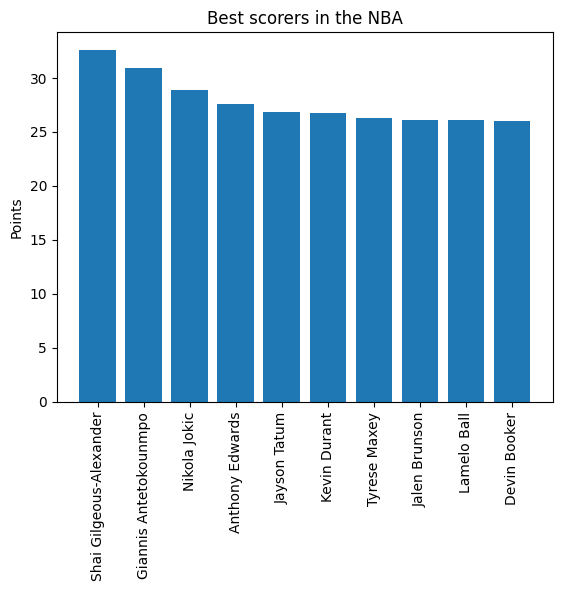

In [87]:
fig, ax = plt.subplots()


ax.bar(best_scorers.index, best_scorers["PTS"])
ax.set_ylabel('Points')
ax.set_title('Best scorers in the NBA')
ax.set_xticklabels(best_scorers.index, rotation=90)

plt.show()

In [96]:
all_players_df = all_players_df.reset_index()
all_players_df

,Id,Name,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,Team
0,3917376,Jaylen Brown,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,Boston Celtics
1,2528693,Torrey Craig,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,Boston Celtics
2,4576085,Jd Davison,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,Boston Celtics
3,4065804,Sam Hauser,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,Boston Celtics
4,3995,Jrue Holiday,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...
523,2779,Chris Paul,"6' 0""",175 lbs,39,PG,3,"$10,460,000",05/06/85,19,Wake Forest,San Antonio Spurs
524,4610139,Jeremy Sochan,"6' 8""",230 lbs,21,F,10,"$5,570,040",05/20/03,2,Baylor,San Antonio Spurs
525,4395630,Devin Vassell,"6' 5""",205 lbs,24,SG,24,"$29,347,826",08/23/00,4,Florida State,San Antonio Spurs
526,5104157,Victor Wembanyama,"7' 3""",235 lbs,21,C,1,"$12,768,960",01/04/04,1,not specified,San Antonio Spurs


In [97]:
all_players_df = all_players_df.set_index("Id")
all_players_df

,Name,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,Team
Id,,,,,,,,,,,
3917376,Jaylen Brown,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,Boston Celtics
2528693,Torrey Craig,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,Boston Celtics
4576085,Jd Davison,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,Boston Celtics
4065804,Sam Hauser,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,Boston Celtics
3995,Jrue Holiday,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...
2779,Chris Paul,"6' 0""",175 lbs,39,PG,3,"$10,460,000",05/06/85,19,Wake Forest,San Antonio Spurs
4610139,Jeremy Sochan,"6' 8""",230 lbs,21,F,10,"$5,570,040",05/20/03,2,Baylor,San Antonio Spurs
4395630,Devin Vassell,"6' 5""",205 lbs,24,SG,24,"$29,347,826",08/23/00,4,Florida State,San Antonio Spurs


In [98]:
all_players_df.rename(columns={"index": "Name"}, inplace=True)
all_players_df

,Name,Height,Weight,Age,Position,Jersey,Salary,Birth date,Experience,College,Team
Id,,,,,,,,,,,
3917376,Jaylen Brown,"6' 6""",223 lbs,28,SG,7,"$49,205,800",10/24/96,8,California,Boston Celtics
2528693,Torrey Craig,"6' 5""",221 lbs,34,SF,12,"$2,845,342",12/19/90,7,South Carolina Upstate,Boston Celtics
4576085,Jd Davison,"6' 1""",195 lbs,22,SG,20,0,10/03/02,2,Alabama,Boston Celtics
4065804,Sam Hauser,"6' 7""",217 lbs,27,SF,30,"$2,092,344",12/08/97,3,Virginia,Boston Celtics
3995,Jrue Holiday,"6' 4""",205 lbs,34,PG,4,"$30,000,000",06/12/90,15,UCLA,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...
2779,Chris Paul,"6' 0""",175 lbs,39,PG,3,"$10,460,000",05/06/85,19,Wake Forest,San Antonio Spurs
4610139,Jeremy Sochan,"6' 8""",230 lbs,21,F,10,"$5,570,040",05/20/03,2,Baylor,San Antonio Spurs
4395630,Devin Vassell,"6' 5""",205 lbs,24,SG,24,"$29,347,826",08/23/00,4,Florida State,San Antonio Spurs


In [99]:
all_players_df.to_csv('nba_players.csv',index=True)